In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.cross_validation import train_test_split
import warnings
warnings.filterwarnings('ignore')

/Users/mikechen/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Task 1

In [97]:
# To extract data, we can use pandas's dataframe
# Here, I learned that data.iloc is a useful method to extract data
data=pd.read_csv('./data.txt',header=None)
print(data.shape)
label = pd.factorize(data[1])[0]
print(label.shape)
feature = data.iloc[:,2:]
print(feature.shape)

(569, 32)
(569,)
(569, 30)


In [98]:
# Split testing and training data
# Typically, we can manually extract first 169 samples to be test set 
# But here is a better method called train_test_split in sklearn, which can do this more randomly
train_X, test_X, train_Y, test_Y = train_test_split(feature,label,test_size=0.297)
print(train_X.shape, train_Y.shape)
print(test_X.shape, test_Y.shape)

((400, 30), (400,))
((169, 30), (169,))


# Task 2

In [99]:
# First, we need to apply PCA using sklearn
from sklearn.decomposition import PCA
pca_original = PCA(n_components=30,svd_solver='randomized',whiten=True)
pca_original.fit(train_X)
pca_3 = PCA(n_components=3,svd_solver='randomized',whiten=True).fit(train_X)
pca_5 = PCA(n_components=5,svd_solver='randomized',whiten=True).fit(train_X)
pca_7 = PCA(n_components=7,svd_solver='randomized',whiten=True).fit(train_X)
pca_9 = PCA(n_components=9,svd_solver='randomized',whiten=True).fit(train_X)
pca_11 = PCA(n_components=11,svd_solver='randomized',whiten=True).fit(train_X)

train_X = pca_original.transform(train_X)
test_X = pca_original.transform(test_X)
train_X_3 = pca_3.transform(train_X)
test_X_3 = pca_3.transform(test_X)
train_X_5 = pca_5.transform(train_X)
test_X_5 = pca_5.transform(test_X)
train_X_7 = pca_7.transform(train_X)
test_X_7 = pca_7.transform(test_X)
train_X_9 = pca_9.transform(train_X)
test_X_9 = pca_9.transform(test_X)
train_X_11 = pca_11.transform(train_X)
test_X_11 = pca_11.transform(test_X)

In [100]:
print(train_X.shape)
print(train_X_3.shape)

(400, 30)
(400, 3)


In [101]:
# Do K-fold validation
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import f1_score

print(train_X.shape[0])

def kfold_clf(clf, X, Y):
    kf = KFold(X.shape[0], n_folds=10, shuffle=False)
    # The method of using kf, using enumerate
    # f1 value store in the following arrays
    validation_f1 = np.zeros((10, 1))
    train_f1 = np.zeros((10, 1))
    for i, (train_index, test_index) in enumerate(kf):
        train_X = X[train_index]
        train_Y = Y[train_index]
        validation_X = X[test_index]
        validation_Y = Y[test_index]
        clf.fit(train_X, train_Y)
        train_pred = clf.predict(train_X)
        validation_pred = clf.predict(validation_X)
        train_f1[i, 0] = f1_score(train_Y, train_pred)
        validation_f1[i, 0] = f1_score(validation_Y, validation_pred)
    print('\tthe average f1 score on train set= %.3f'%(train_f1.mean()))
    print('\tthe average f1 score on validation set =.%3f'%(validation_f1.mean()))

400


In [102]:
from sklearn.tree import DecisionTreeClassifier
decision_tree=DecisionTreeClassifier()
decision_tree_3=DecisionTreeClassifier()
decision_tree_5=DecisionTreeClassifier()
decision_tree_7=DecisionTreeClassifier()
decision_tree_9=DecisionTreeClassifier()
decision_tree_11=DecisionTreeClassifier()

In [104]:
dt_list=[decision_tree,decision_tree_3,decision_tree_5,decision_tree_7,decision_tree_9,decision_tree_11]
train_list=[train_X, train_X_3, train_X_5, train_X_7, train_X_9, train_X_11]
test_list=[test_X, test_X_3, test_X_5, test_X_7, test_X_9, test_X_11]
f1_score_list=[]

for i in range(6):
    kfold_clf(dt_list[i], train_list[i], train_Y)
    test_pred = dt_list[i].predict(test_list[i])
    f1=f1_score(test_Y,test_pred)
    f1_score_list.append(f1)
print(f1_score_list)

	the average f1 score on train set= 1.000
	the average f1 score on validation set =.0.931748
	the average f1 score on train set= 1.000
	the average f1 score on validation set =.0.704366
	the average f1 score on train set= 1.000
	the average f1 score on validation set =.0.722340
	the average f1 score on train set= 1.000
	the average f1 score on validation set =.0.798272
	the average f1 score on train set= 1.000
	the average f1 score on validation set =.0.802273
	the average f1 score on train set= 1.000
	the average f1 score on validation set =.0.814103
[0.923076923076923, 0.6494845360824743, 0.7363184079601991, 0.8155339805825242, 0.8256880733944955, 0.8202764976958525]


[0.923076923076923, 0.6494845360824743, 0.7363184079601991, 0.8155339805825242, 0.8256880733944955, 0.8202764976958525]


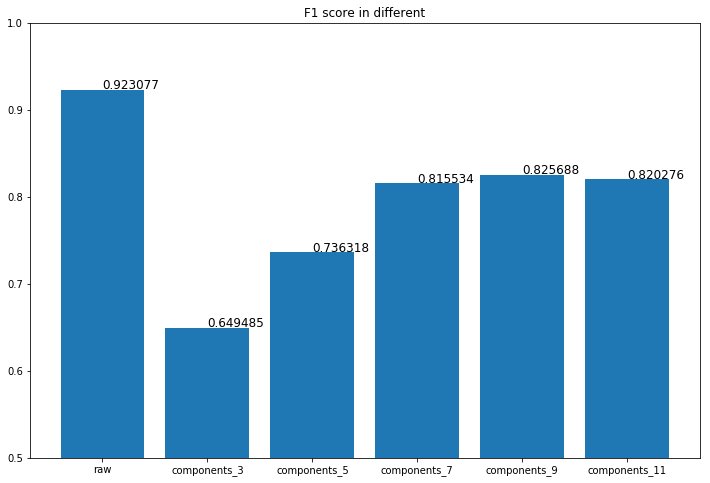

In [112]:
x_label=['raw','components_3','components_5','components_7','components_9','components_11']
plt.figure(figsize=(12,8))
print(f1_score_list)
plt.bar(x_label,f1_score_list)
plt.ylim(0.5,1)
for a,b in zip(x_label,f1_score_list):
    plt.text(a, b+0.001, '%f' % b,fontsize=12)
plt.title('F1 score in different')
plt.savefig('F1 score in different.jpg')